<a href="https://colab.research.google.com/github/Pragna235/CODSOFT/blob/main/Titanic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction

In [ ]:
#import all necessary modules
# Step - 1 Collecting Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
#to run matplotlib.plyplot module in jupyter notebook
%matplotlib inline

In [ ]:
# Read all your datasets in csv format
# Step - 1 Collectin Data
train_data = pd.read_csv("/train.csv")
#test_data = pd.read_csv("/test.csv")
#gender_submission_data = pd.read_csv("/gender_submission.csv") #sample output file

In [ ]:
print("Shape = ",train_data.shape)
train_data.head()

Shape =  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Number of Passenger in the train dataset : ",len(train_data.index))

Number of Passenger in the train dataset :  891


<Axes: xlabel='Survived', ylabel='count'>

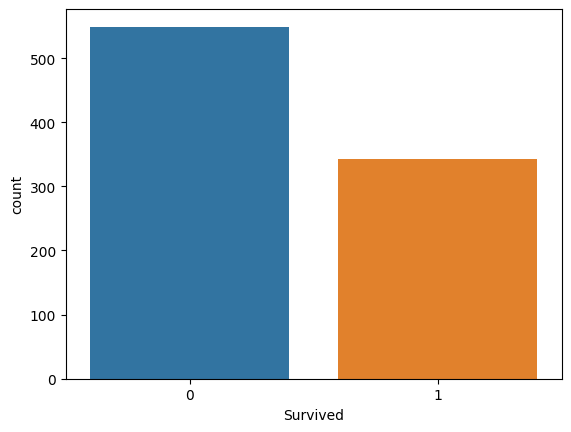

In [ ]:
# Step - 2 Analyzing Data
#Analyze how many passengers survived and how many did not of total passengers
sns.countplot(x = "Survived",data = train_data)

<Axes: xlabel='Survived', ylabel='count'>

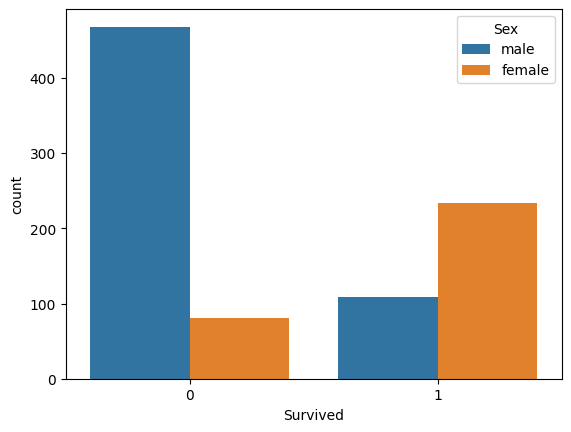

In [ ]:
# Analyze how many males and females survived and how many of them didn't survive
sns.countplot(x="Survived",hue="Sex",data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

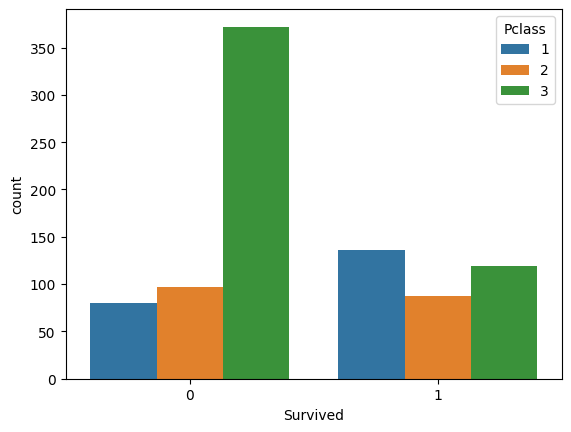

In [ ]:
#Analyze which passenger class people survived and which did not
sns.countplot(x="Survived",hue="Pclass",data=train_data)

<Axes: ylabel='Frequency'>

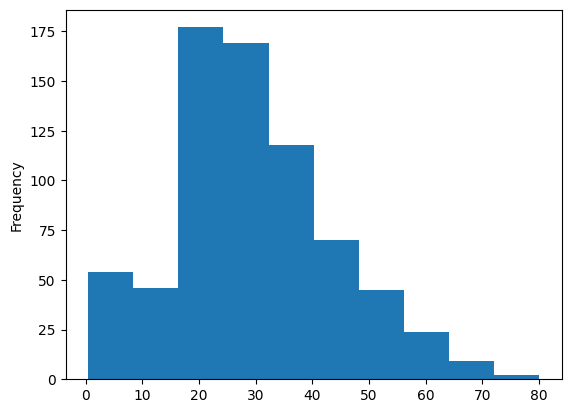

In [ ]:
# Plot a histogram to analyze the ages of passengers
train_data["Age"].plot.hist()

<Axes: ylabel='Frequency'>

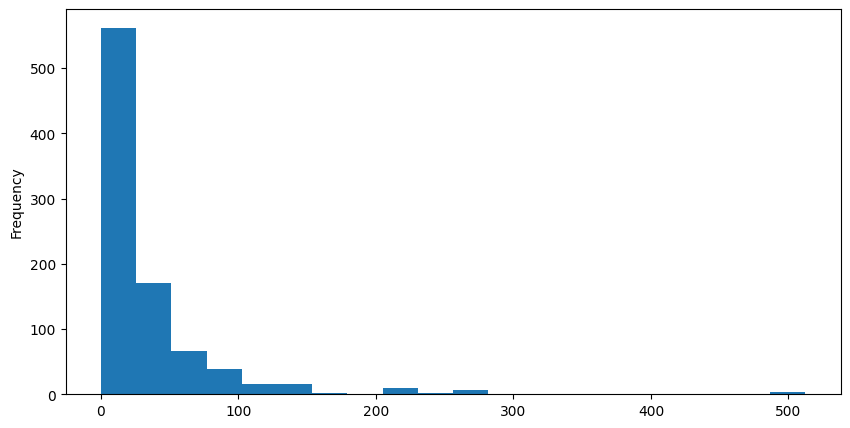

In [ ]:
#Analyze the Fare column
train_data['Fare'].plot.hist(bins=20, figsize=(10,5))

In [ ]:
#Analyze the other columns as well
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

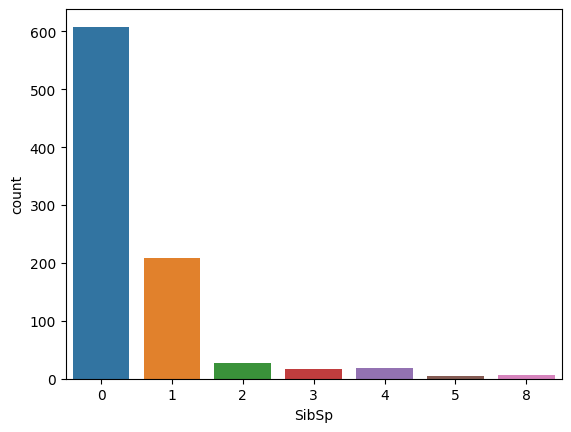

In [ ]:
#Analyze the Siblings column
sns.countplot(x="SibSp",data=train_data)

In [ ]:
# Step - 3 Data Wrangling (Remove all garbage values)
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check which columns have null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

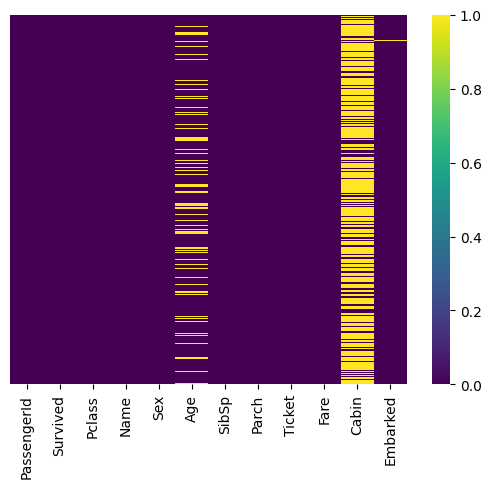

In [ ]:
sns.heatmap(train_data.isnull(),yticklabels = False,cmap = 'viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

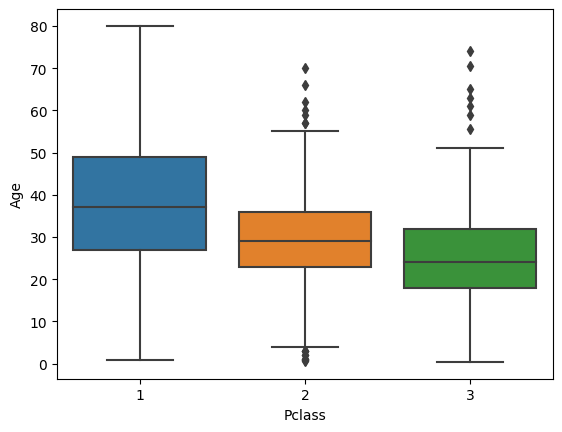

In [ ]:
#Replace the null values or drop the column
sns.boxplot(x='Pclass',y='Age',data=train_data)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Now we can apply Logistic Regression
# Our dependent variable or the variable to be predicted is the Survived column and the
#others can be our independent variables
train_data.drop("Cabin",axis=1,inplace=True)
train_data.head() #Here the Cabin is already dropped, so if you run again, it shows error

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train_data.dropna(inplace=True)

<Axes: >

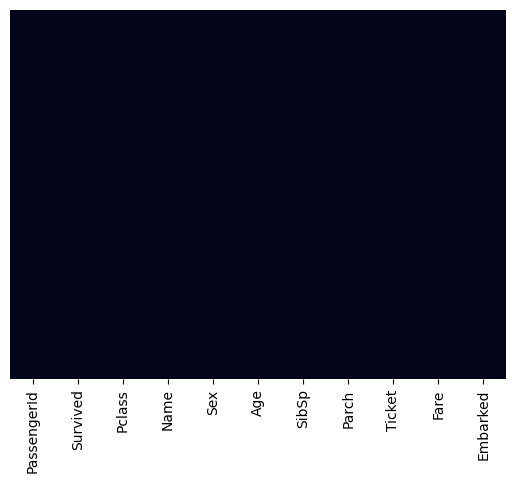

In [ ]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [ ]:
# There are a lot of string values - so replace them with dummy variables
pd.get_dummies(train_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [ ]:
#We don't need two columns for male and female. One is enough
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embark = pd.get_dummies(train_data['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
#Here also, we don't need three columns
embark=pd.get_dummies(train_data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
#Do the same to the Passenger Class
Pc1 = pd.get_dummies(train_data['Pclass'],drop_first=True)
Pc1.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [ ]:
train_data = pd.concat([train_data,sex,embark,Pc1],axis=1)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [ ]:
train_data.drop(["Sex","Embarked","PassengerId","Name","Ticket"],axis=1,inplace=True)

In [ ]:
train_data.drop("Pclass",axis=1,inplace=True)

In [ ]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [ ]:
# Step - 4 Training and Testing Data
#Train Data
X = train_data.drop("Survived",axis=1)
X.columns = X.columns.astype(str) # compulsory (All your column headings should be in string format)
y = train_data["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

array([[102,  24],
       [ 25,  63]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,predictions)

0.7710280373831776

In [ ]:
logmodel.score(X_train,y_train)
logmodel.score(X_test,y_test)

0.7710280373831776